<a href="https://colab.research.google.com/github/hamzaabialal/data/blob/main/Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
area_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/area_data.csv")
export_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/export.csv")
import_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/import.csv")
prices_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/prices.csv")
production_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/production_data.csv")
yield_data = pd.read_csv("https://raw.githubusercontent.com/hamzaabialal/data/refs/heads/main/yield_data.csv")


In [ ]:
print("Area Data:", area_data.shape)
print("Export Data:", export_data.shape)
print("Import Data:", import_data.shape)
print("Prices Data:", prices_data.shape)
print("Production Data:", production_data.shape)
print("Yield Data:", yield_data.shape)

Area Data: (2353, 7)
Export Data: (31, 9)
Import Data: (31, 9)
Prices Data: (2966, 5)
Production Data: (2358, 7)
Yield Data: (2357, 7)


In [ ]:
area_data.head()

,YEAR,Punjab,Sindh,Khyber Pakhtoonkhaw,Balochistan,PAKISTAN,crop
0,1947-48,6.0,0.0,0.0,0.0,6.0,linseed
1,1948-49,6.0,0.0,0.0,0.0,6.0,linseed
2,1949-50,6.0,0.0,0.0,0.0,6.0,linseed
3,1950-51,8.0,0.0,0.0,0.0,8.0,linseed
4,1951-52,8.0,0.0,0.0,0.0,8.0,linseed


In [ ]:
export_data.head()

,Sr.No,Commodity,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,Qty,1189.604,689.487,48.083,-,-,-
1,2,Rice All,Qty,4096.446,4104.983,4166.130,3691.437,4975.926,3717.559
2,3,Rice Basmati,Qty,520.759,668.763,890.207,629.069,758.219,595.120
3,4,Rice Others,Qty,3585.251,3436.220,3275.923,3062.368,4217.707,3122.439
4,5,Sugar,Qty,1469.802,691.994,181.447,-,-,215.751


In [ ]:
import_data.head()

,Sr.No,Commodity,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,Qty,-,-.1,-.2,3612.638,2206.880,2729.238
1,2,Sugar,Qty,8.794,7.563,7.473,281.329,312.393,6.205
2,3,Raw Cotton,Qty,610.149,414.659,536.231,857.373,776.394,683.911
3,4,Pulses,Qty,723.843,976.669,1211.383,1266.313,897.352,1344.412
4,5,Soyabean Oil,Qty,156.718,150.912,84.317,116.637,143.530,227.385


In [ ]:
production_data.head()

,YEAR,Punjab,Sindh,Khyber Pakhtoonkhaw,Balochistan,PAKISTAN,crop
0,1957-58,79.0,5.0,4.0,0.0,88.0,citrus
1,1958-59,89.0,4.0,13.0,0.0,106.0,citrus
2,1959-60,286.0,5.0,7.0,0.0,298.0,citrus
3,1960-61,301.0,3.0,4.0,0.0,308.0,citrus
4,1961-62,340.0,6.0,13.0,0.0,359.0,citrus


In [ ]:
prices_data.head()

,Crop,Min,Max,FQP,city
0,Apple Kala Kullu (Pahari),28100,32000,30050,TTSingh
1,Apricot White,26200,27000,26600,TTSingh
2,Banana(DOZEN),112,125,119,TTSingh
3,Grapes Sundekhani,39500,45000,42250,TTSingh
4,Guava,10500,12000,11250,TTSingh


In [ ]:
yield_data.head()

,YEAR,Punjab,Sindh,Khyber Pakhtoonkhaw,Balochistan,PAKISTAN,crop
0,1947-48,9.38,8.4,5.36,9.15,8.73,rice
1,1948-49,10.6,7.9,7.4,8.6,8.90,rice
2,1949-50,9.92,7.77,7.24,8.2,8.59,rice
3,1950-51,8.8,9.09,5.92,8.4,8.89,rice
4,1951-52,9.35,7.71,7.24,7.04,8.23,rice


# **Model Training on Area Data Set**

In [ ]:
y_area_data = area_data["crop"]
y_area_data = area_data["crop"]

# Step 2: Convert the 'crop' column to category
y_area_data = y_area_data.astype('category')
y_area_data.head()

,crop
0,linseed
1,linseed
2,linseed
3,linseed
4,linseed


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming area_data is already loaded
# Step 1: Set the target variable
y_area_data = area_data["crop"].astype('category')

# Step 2: Convert the 'crop' column to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_area_data)

# Step 3: Prepare the feature DataFrame by dropping the 'crop' column
x_area_data = area_data.drop("crop", axis=1)

# Step 4: Convert relevant columns in x_area_data to category
x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')

# Step 5: Drop rows with null values in x_area_data
x_area_data = x_area_data.dropna(subset=["YEAR", "Punjab", "Sindh", "Khyber Pakhtoonkhaw", "Balochistan", "PAKISTAN"])

# Step 6: Align the encoded target with x_area_data
y_encoded = y_encoded[x_area_data.index]

# Step 7: Verify that y_encoded has no NaN values
print("NaN values in y_encoded:", pd.isna(y_encoded).sum())

# Step 8: Split the data into training and testing sets
# Check the shapes

x_area_data= area_data.drop("crop", axis=1)

x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')
x_area_data.isnull().sum()
x_area_data = x_area_data.dropna(subset=["YEAR", "Punjab", "Sindh", "Khyber Pakhtoonkhaw", "Balochistan", "PAKISTAN"])
x_area_data.isnull().sum()
print("Null Values",y_area_data.isnull().sum())
print("Null Values",x_area_data.isnull().sum())
print(x_area_data.dtypes)
print(y_encoded)




NaN values in y_encoded: 0
Null Values 0
Null Values YEAR                   0
Punjab                 0
Sindh                  0
Khyber Pakhtoonkhaw    0
Balochistan            0
PAKISTAN               0
dtype: int64
YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object
[16 16 16 ... 19 19 19]


In [ ]:
from sklearn.model_selection import train_test_split
y_area_data = y_area_data.reset_index(drop=True)
x_area_data = x_area_data.reset_index(drop=True)
x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')
x_train, x_test, y_train, y_test = train_test_split(x_area_data,y_encoded, test_size=0.2, random_state=100)
print(x_train.dtypes)
print(x_test.dtypes)


YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object
YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object


In [ ]:
print(x_train.dtypes)


YEAR                   category
Punjab                 category
Sindh                  category
Khyber Pakhtoonkhaw     float64
Balochistan             float64
PAKISTAN                float64
dtype: object


In [ ]:
print(x_area_data)


         YEAR Punjab Sindh  Khyber Pakhtoonkhaw  Balochistan  PAKISTAN
0     1947-48    6.0   0.0                 0.00         0.00      6.00
1     1948-49    6.0   0.0                 0.00         0.00      6.00
2     1949-50    6.0   0.0                 0.00         0.00      6.00
3     1950-51    8.0   0.0                 0.00         0.00      8.00
4     1951-52    8.0   0.0                 0.00         0.00      8.00
...       ...    ...   ...                  ...          ...       ...
2343  2017-18  27.43  0.49                 1.98         7.91     37.81
2344  2018-19  24.68  0.49                 2.22         7.91     35.31
2345  2019-20  23.05  0.25                 2.22         7.91     33.43
2346  2020-21  11.67  0.06                 2.38        13.15     27.26
2347  2021-22    4.2  0.07                 2.26        13.32     19.86

[2348 rows x 6 columns]


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming area_data is already loaded
# Step 1: Set the target variable and encode it
y_area_data = area_data["crop"].astype('category')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_area_data)

# Step 2: Prepare the feature DataFrame
x_area_data = area_data.drop("crop", axis=1)

# Convert categorical columns to category type
x_area_data["YEAR"] = x_area_data['YEAR'].astype('category')
x_area_data["Punjab"] = x_area_data['Punjab'].astype('category')
x_area_data["Sindh"] = x_area_data['Sindh'].astype('category')

# Step 3: Drop rows with null values in x_area_data
x_area_data = x_area_data.dropna(subset=["YEAR", "Punjab", "Sindh", "Khyber Pakhtoonkhaw", "Balochistan", "PAKISTAN"])

# Step 4: Align the encoded target with x_area_data
y_encoded = y_encoded[x_area_data.index]

# Step 5: One-Hot Encoding for categorical features
x_area_data = pd.get_dummies(x_area_data, drop_first=True)

# Step 6: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_area_data, y_encoded, test_size=0.2, random_state=100)

# Step 7: Initialize and fit the Linear Regression model
clf = RandomForestClassifier(random_state=100)
clf.fit(x_train, y_train)

# Check the shapes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(1878, 2690) (470, 2690) (1878,) (470,)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=100)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [40]:
y_lr_area_data_train_pred = clf.predict(x_train)
y_lr_area_data_test_pred = clf.predict(x_test)
y_lr_area_data_train_pred


array([18, 20,  6, ..., 33,  2,  8])

In [ ]:
y_lr_area_data_test_pred

array([29,  2,  1, 25, 21, 15, 23, 22,  7, 11, 10,  6, 15, 19, 19, 20,  4,
        0, 23, 30, 28, 17,  4, 16,  4, 16, 21, 28, 28,  3, 19, 26, 14, 23,
       22, 12, 15, 11, 16,  6, 31,  6, 10, 23, 27, 30, 14,  6, 18, 14, 12,
       17, 15,  6, 31, 33, 23, 19, 17, 21,  4, 27,  4, 13, 11, 12, 18, 28,
       26, 12, 28, 27, 22, 27, 23,  1, 26, 28, 13,  1, 28, 29,  6, 28, 31,
       33, 21,  0, 15, 30,  3,  9, 26, 32, 23, 17, 31, 32, 20, 17, 14, 32,
        5, 23, 31, 32, 16,  7, 14, 21,  0,  7, 12,  6,  0, 31,  2, 14, 18,
       29,  4, 13, 15, 33, 22, 15, 26,  0, 24, 13, 30, 21,  0, 20, 31, 29,
       14,  9, 16, 24, 22, 19, 17, 12,  4, 18,  6,  2, 16,  5, 33,  0,  6,
       20, 22, 15,  8,  0,  1, 21,  7, 12, 29, 16,  9,  6,  6,  7, 15, 14,
        8, 23,  2,  0, 13, 30, 26,  8,  3,  3, 18, 29, 17, 26, 33,  7,  9,
        6, 31, 31, 18, 13, 19, 21,  2, 19, 20, 26,  9,  4,  4, 32, 33,  2,
       21,  6, 29, 21,  8, 17, 26, 31, 14,  4,  2, 31, 12, 25, 11,  9,  6,
        6, 21, 10,  8, 13

In [ ]:
y_encoded

array([16, 16, 16, ..., 19, 19, 19])

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_lr_area_data_train_pred)
rf_test_mse = mean_squared_error(y_test, y_lr_area_data_test_pred)
rf_train_r2 = r2_score(y_train, y_lr_area_data_train_pred)
rf_test_r2 = r2_score(y_test, y_lr_area_data_test_pred)
print("Random Forest Regression Train MSE:", rf_train_mse)
print("Random Forest Regression Test MSE:", rf_test_mse)

Random Forest Regression Train MSE: 0.0
Random Forest Regression Test MSE: 29.642553191489363


In [42]:
lr_results  =  pd.DataFrame(["Random Forest Regressor", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Regressor,0.0,1.0,29.642553,0.675425


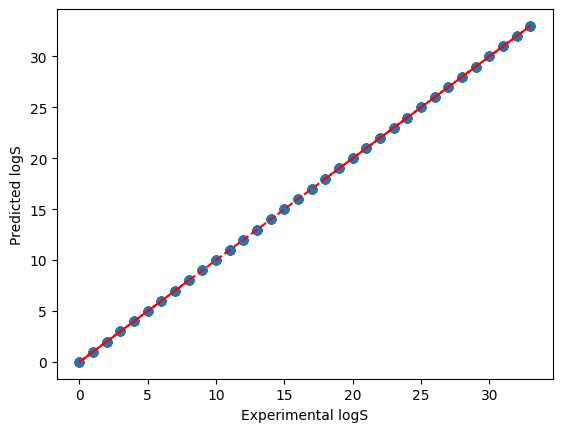

In [43]:
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_train, y_lr_area_data_train_pred, 1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),"r--")
plt.scatter(y_train, y_lr_area_data_train_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

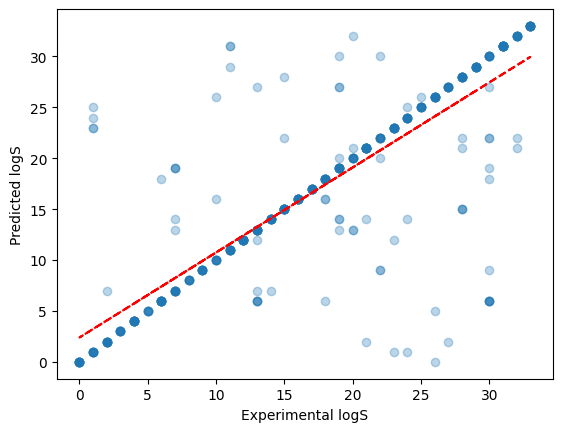

In [44]:
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_test, y_lr_area_data_test_pred, 1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.scatter(y_test, y_lr_area_data_test_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

In [ ]:
import joblib
joblib.dump(clf, 'area_data_model.pkl')

['area_data_model.pkl']

# **Training Model On Export Data Set**

In [3]:
export_data.head()

,Sr.No,Commodity,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Wheat,Qty,1189.604,689.487,48.083,-,-,-
1,2,Rice All,Qty,4096.446,4104.983,4166.130,3691.437,4975.926,3717.559
2,3,Rice Basmati,Qty,520.759,668.763,890.207,629.069,758.219,595.120
3,4,Rice Others,Qty,3585.251,3436.220,3275.923,3062.368,4217.707,3122.439
4,5,Sugar,Qty,1469.802,691.994,181.447,-,-,215.751


In [6]:
y_export_data = export_data["Commodity"]
x_export_data = export_data.drop("Commodity", axis=1)
x_export_data, y_export_data

(    Sr.No  Qty   2017-18   2018-19   2019-20   2020-21   2021-22   2022-23
 0       1  Qty  1189.604   689.487    48.083         -         -         -
 1       2  Qty  4096.446  4104.983  4166.130  3691.437  4975.926  3717.559
 2       3  Qty   520.759   668.763   890.207   629.069   758.219   595.120
 3       4  Qty  3585.251  3436.220  3275.923  3062.368  4217.707  3122.439
 4       5  Qty  1469.802   691.994   181.447         -         -   215.751
 5       6  Qty    35.347    12.665    12.776     0.594     2.752    11.635
 6       7  Qty   710.221   768.208   807.313   982.269   622.086   628.823
 7       8  Qty   875.269  1029.735   836.330   950.724   939.714  1336.757
 8       9  Qty    29.634    51.088    21.574    86.970   144.120   174.471
 9      10  Qty    24.363    49.414    19.571    79.464   138.295    97.289
 10     11  Qty     3.268     2.628     1.825     0.209     2.913     2.053
 11     12  Qty   570.262   660.649   364.791   395.284   566.205  1060.756
 12     13  

# **Data Processing**



In [8]:
print("Null Vlaues In y", y_export_data.isnull().sum())
print("Null Vlaues In x", x_export_data.isnull().sum())
print("D Types of x ", x_export_data.dtypes)
print("D Types of y ", y_export_data.dtypes)

Null Vlaues In y 0
Null Vlaues In x Sr.No      0
Qty        0
2017-18    0
2018-19    0
2019-20    0
2020-21    0
2021-22    0
2022-23    0
dtype: int64
D Types of x  Sr.No        int64
Qty         object
2017-18     object
2018-19     object
2019-20    float64
2020-21     object
2021-22     object
2022-23     object
dtype: object
D Types of y  object


In [11]:
x_export_data["2017-18"] = x_export_data['2017-18'].astype('category')
x_export_data["2018-19"] = x_export_data['2018-19'].astype('category')
x_export_data["2019-20"] = x_export_data['2019-20'].astype('category')
x_export_data["2020-21"] = x_export_data['2020-21'].astype('category')
x_export_data["2021-22"] = x_export_data['2021-22'].astype('category')
x_export_data["Qty"] = x_export_data['2021-22'].astype('category')
x_export_data["2022-23"] = x_export_data['2022-23'].astype('category')
x_export_data.dtypes

,0
Sr.No,int64
Qty,category
2017-18,category
2018-19,category
2019-20,category
2020-21,category
2021-22,category
2022-23,category


In [12]:
y_export_data = y_export_data.astype('category')
y_export_data.dtypes

CategoricalDtype(categories=['Apple Fresh', 'Apricot Fresh', 'Bananas', 'Carrot & Turnip',
                  'Dates Dried', 'Dates Fresh', 'Fruits All', 'Garlic',
                  'Grape Fruit', 'Grapes Fresh', 'Guava', 'Kino',
                  'Lemon & Lime', 'Mango', 'Oil Seeds, Nuts & Kernals',
                  'Onion', 'Peas Fresh & Chillied', 'Pomegranate', 'Potato',
                  'Raw Cotton', 'Red Chilli', 'Rice All', 'Rice Basmati',
                  'Rice Others', 'Sesamum (SESAME) Seeds', 'Sugar', 'Tomato',
                  'Turmeric', 'Vegetables All', 'Water Melon', 'Wheat'],
, ordered=False, categories_dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_export_data)
y_encoded
x_encoded = x_export_data.apply(lambda col: label_encoder.fit_transform(col))
x_encoded

,Sr.No,Qty,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,0,0,11,25,18,0,0,0
1,1,22,24,20,30,16,22,22
2,2,26,26,24,28,21,26,24
3,3,21,22,19,29,14,21,21
4,4,0,14,26,22,0,0,16
5,5,16,21,13,13,7,16,9
6,6,24,28,28,26,26,24,25
7,7,27,29,12,27,24,27,12
8,8,12,19,22,16,23,12,13
9,9,11,18,21,15,22,11,27


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded,y_encoded, test_size=0.2, random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 8), (7, 8), (24,), (7,))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=2, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [47]:
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Random Forest Regression Train MSE:", train_mse)
print("Random Forest Regression Test MSE:", test_mse)
print("Random Forest Regression Train R²:", train_r2)
print("Random Forest Regression Test R²:", test_r2)

Random Forest Regression Train MSE: 77.84601607105242
Random Forest Regression Test MSE: 78.60841880707369
Random Forest Regression Train R²: 0.17825904621011635
Random Forest Regression Test R²: 0.139265676098848


In [49]:
rf_results  =  pd.DataFrame(["Random Forest Classifier", train_mse, train_r2, test_mse, test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Classifier,77.846016,0.178259,78.608419,0.139266


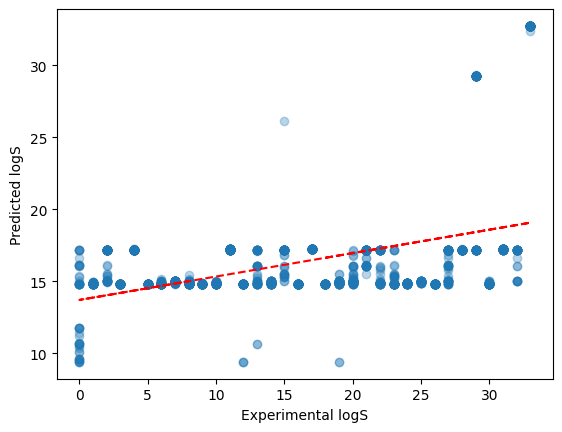

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_train, y_train_pred, 1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),"r--")
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

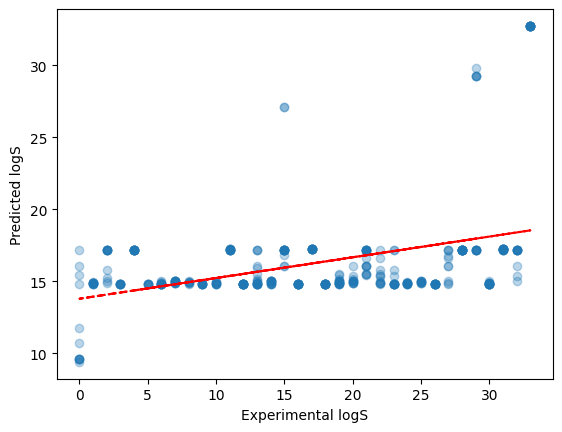

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_test, y_test_pred, 1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.show()

# **Model Training on Import Data**